In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pymc3 as pm

# MCMC Coin Flipping

Now let's assume we have two coins, we've flipped both 100 times, and counted 35 heads with the first coint and 67 heads with the second.  Using a uniform prior for the bias of the two coins, estimate the 2-D posterior for the coin biases.

In [3]:
a1, b1 = 1, 1
a2, b2 = 1, 1
N1, z1 = 100, 35
N2, z2 = 100, 67

double_flip_model = pm.Model()

with double_flip_model:
    # Priors for unknown model parameters
    theta1 = pm.Beta('theta1', alpha=a1, beta=b1)
    theta2 = pm.Beta('theta2', alpha=a2, beta=b2)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Binomial('Y1_obs', n=N1, p=theta1, observed=z1) * pm.Binomial('Y2_obs', n=N2, p=theta2, observed=z2)

In [4]:
nsteps = 5000

with double_flip_model:
    # draw posterior samples
    trace = pm.sample(nsteps)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta2, theta1]
Sampling 4 chains, 0 divergences: 100%|██████████| 22000/22000 [00:03<00:00, 5637.36draws/s]


and look at the trace.

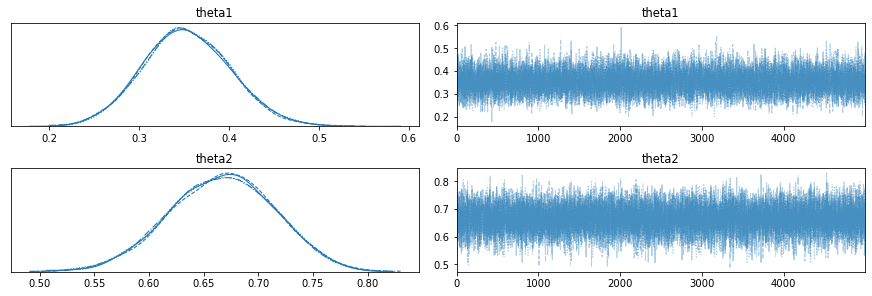

In [5]:
pm.traceplot(trace);

We can look at these samples in two dimensions with a scatter plot, unpacking the trace by hand.

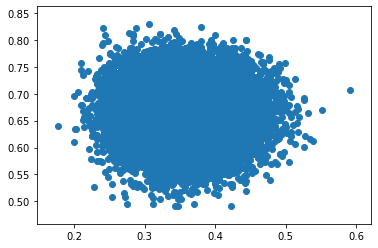

In [6]:
plt.scatter(trace['theta1'], trace['theta2']);

Or use PyMC's `plot_pair()` utility which will do this automatically from the trace object (including labels).

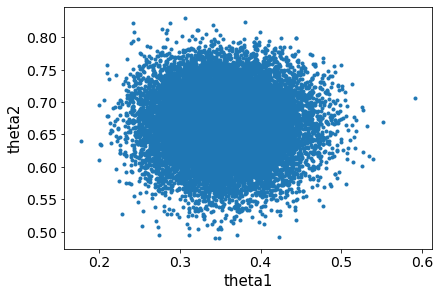

In [7]:
pm.plot_pair(trace);

We can use the same function to make 2-D histograms.

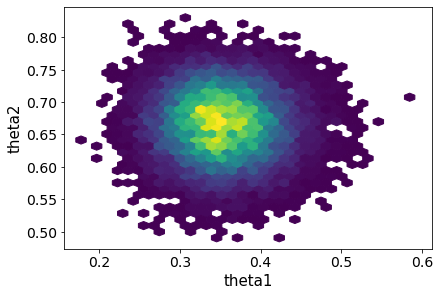

In [8]:
pm.plot_pair(trace, kind='hexbin');

Or a 2-D [KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation) with contours.

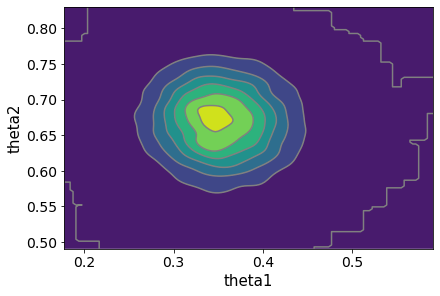

In [9]:
pm.plot_pair(trace, kind='kde');

`plot_forest()` can be used to see inter-chain agreement, and compare marginal distributions of parameters.

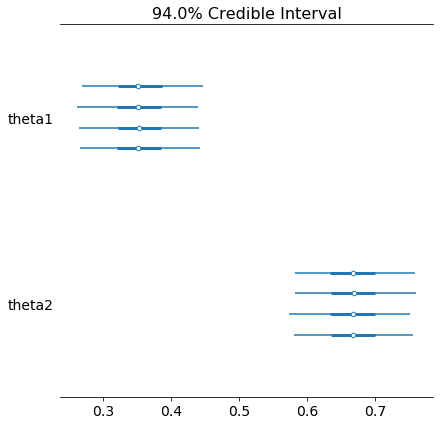

In [10]:
pm.plot_forest(trace);

Or to make ridge plots that stack 1-D distributions side-by-side for easy comparison.

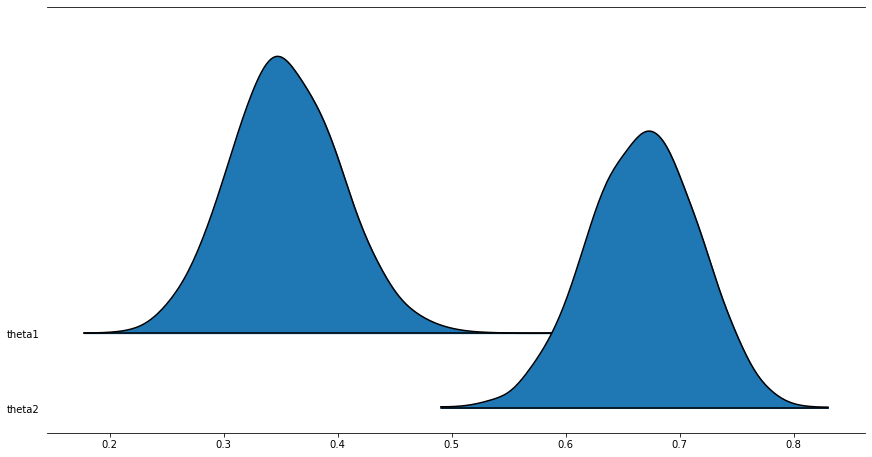

In [11]:
pm.plot_forest(trace, kind='ridgeplot', combined=True, ridgeplot_overlap=5);

# Parameter arrays in PyMC3

Instead of defining individual scalars for each coin bias we could have used the `shape=` keyword argument.

In [12]:
a, b = 1, 1

double_flip_model = pm.Model()

with double_flip_model:
    # Priors for unknown model parameters
    theta = pm.Beta('theta', alpha=a, beta=b, shape=2)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Binomial('Y1_obs', n=N1, p=theta[0], observed=z1) * pm.Binomial('Y2_obs', n=N2, p=theta[1], observed=z2)

In [13]:
nsteps = 5000

with double_flip_model:
    # draw posterior samples
    trace = pm.sample(nsteps)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains, 0 divergences: 100%|██████████| 22000/22000 [00:03<00:00, 6046.53draws/s]


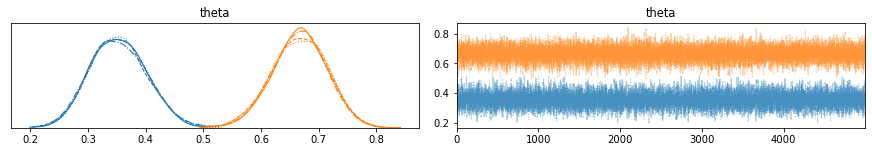

In [14]:
pm.traceplot(trace);

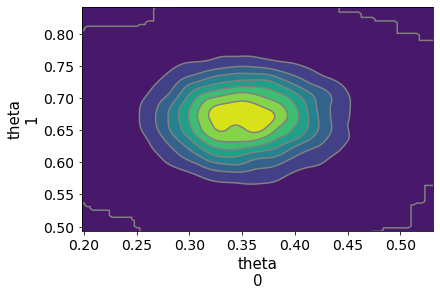

In [15]:
pm.plot_pair(trace, kind='kde');

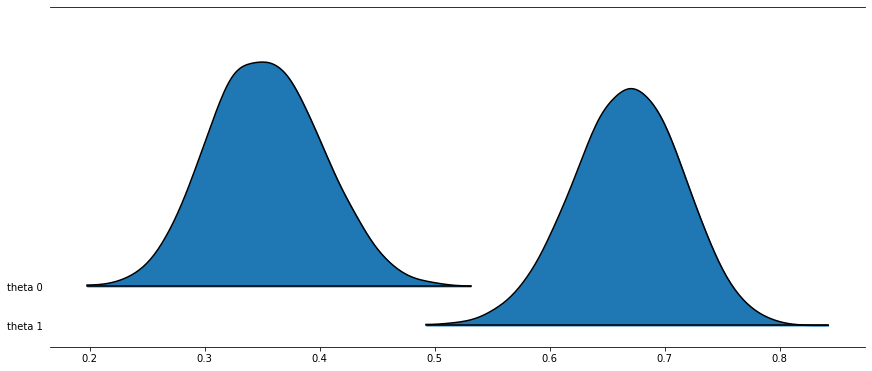

In [16]:
pm.plot_forest(trace, kind='ridgeplot', combined=True, ridgeplot_overlap=5);

# Check convergence and sampling

In [17]:
pm.stats.rhat(trace)

<xarray.Dataset>
Dimensions:      (theta_dim_0: 2)
Coordinates:
  * theta_dim_0  (theta_dim_0) int64 0 1
Data variables:
    theta        (theta_dim_0) float64 1.0 1.001

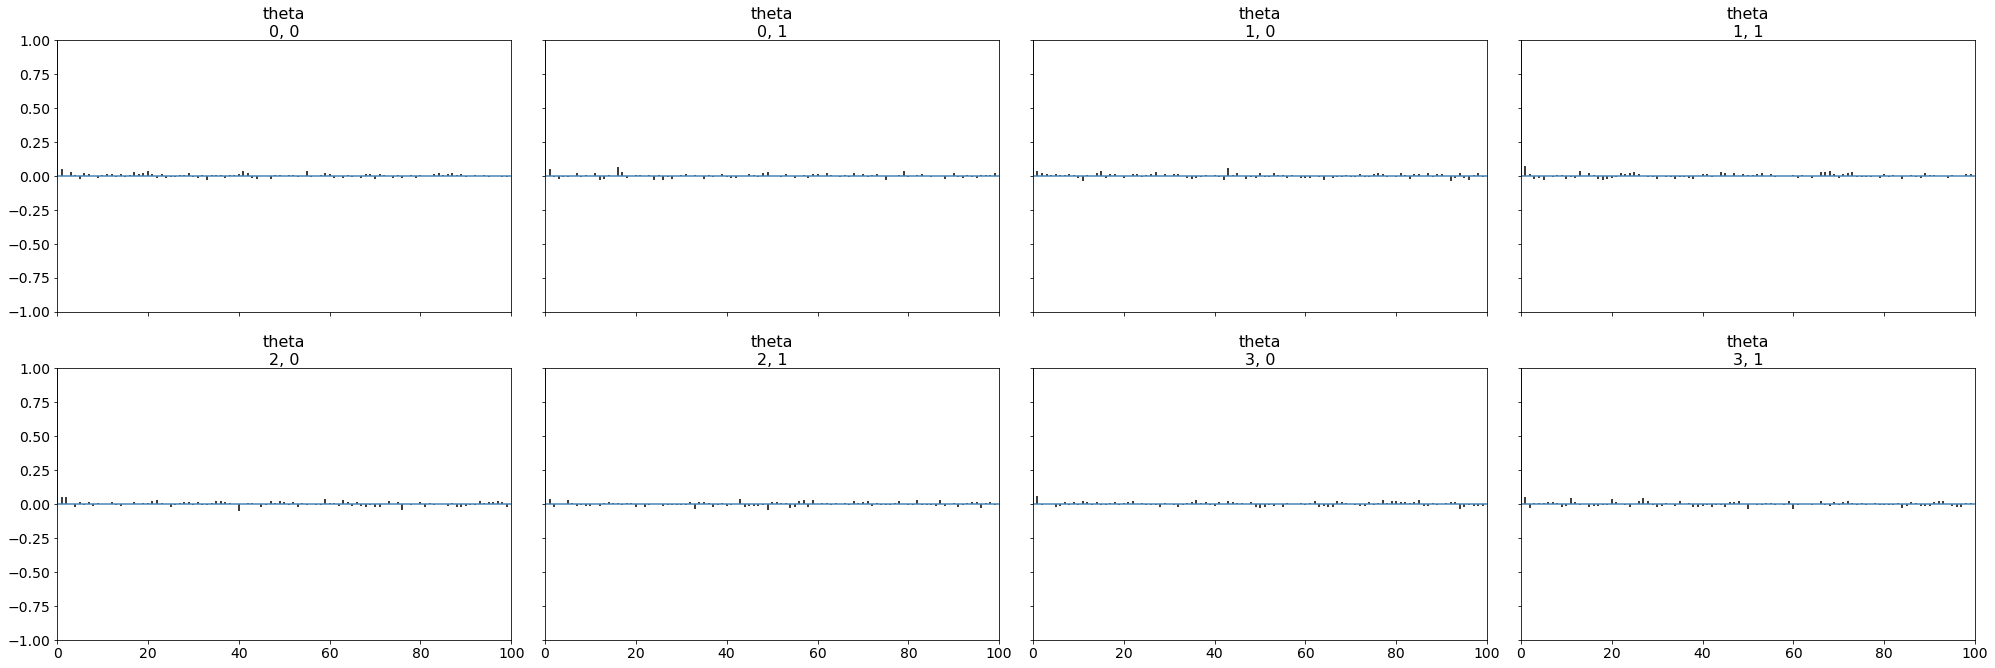

In [18]:
pm.autocorrplot(trace);

In [19]:
pm.effective_n(trace)

/opt/conda/lib/python3.7/site-packages/pymc3/stats/__init__.py:50: UserWarning: effective_n has been deprecated. In the future, use ess instead.
  warnings.warn("effective_n has been deprecated. In the future, use ess instead.")


<xarray.Dataset>
Dimensions:      (theta_dim_0: 2)
Coordinates:
  * theta_dim_0  (theta_dim_0) int64 0 1
Data variables:
    theta        (theta_dim_0) float64 1.744e+04 1.815e+04